# Decomposition methods for time series

Following the previous example on monthly milk production (per cow) in the US
for the 1994-2005 period, we want to make a time series decomposition using two different
methods.

In [4]:
# source: http://www.escet.urjc.es/biodiversos/R/milk.csv
milk <- read.csv("data/milk.csv", header=T, sep=",")

In [5]:
head(milk)

,year,month,milk
1,1994,January,1343
2,1994,February,1236
3,1994,March,1401
4,1994,April,1396
5,1994,May,1457
6,1994,June,1388


We will need to transform this into a time series before further processing.

In [10]:
# one data point / month, beginning in January 1994
milk.ts <- ts(data=milk$milk, start=c(1994, 1), frequency=12)

We can see that milk production shows an upward trend and is seasonal.

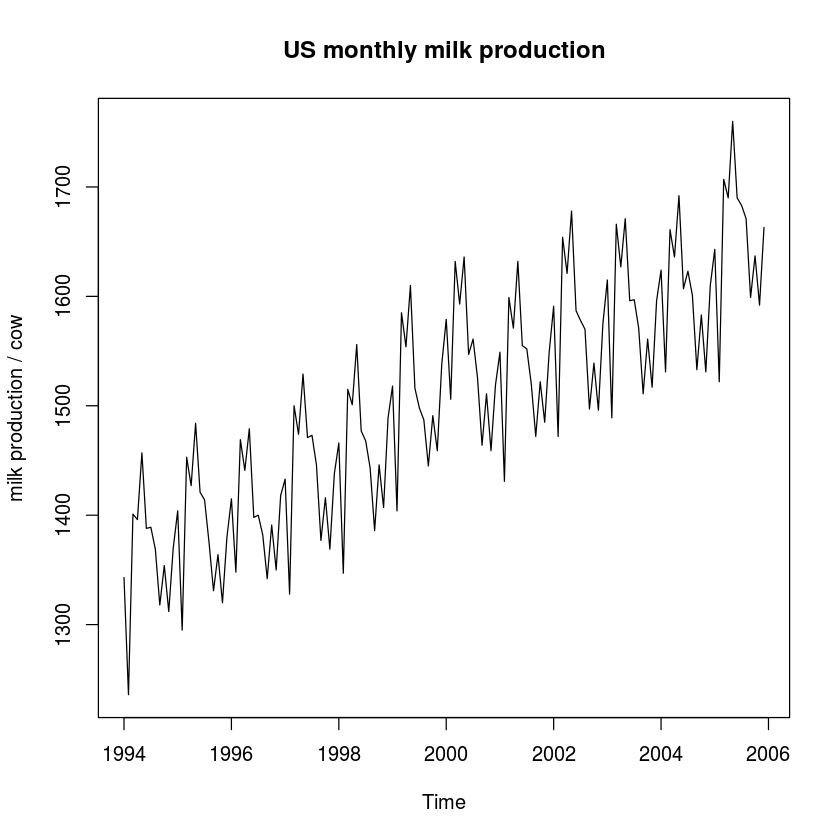

In [11]:
plot(milk.ts, ylab = "milk production / cow", main="US monthly milk production")

## Task 1: Decompose by moving averages

In [13]:
milk.ma <- decompose(milk.ts)

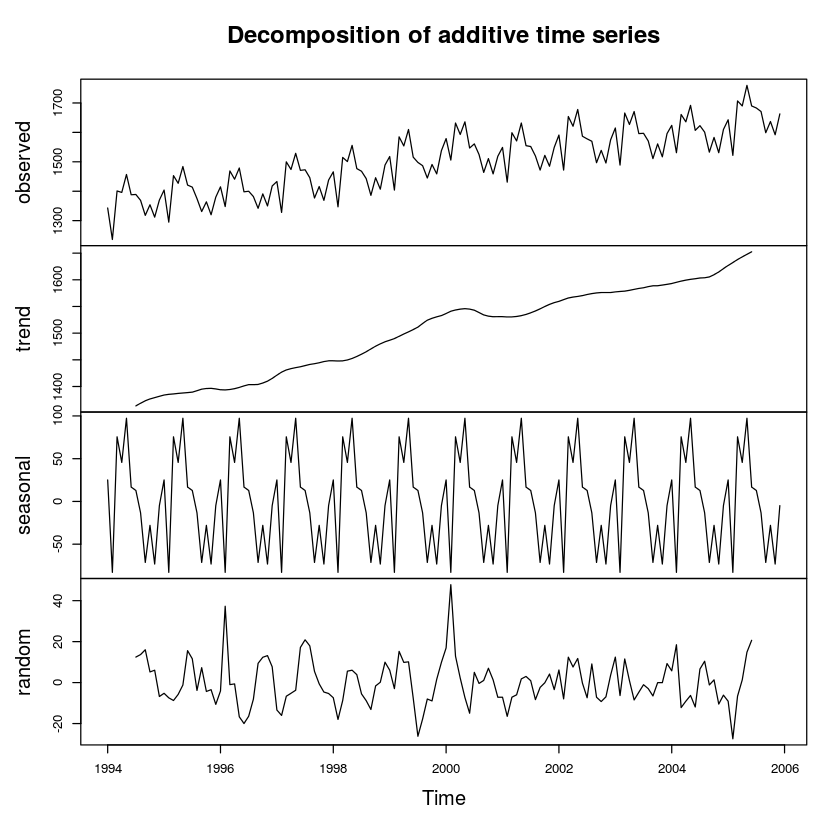

In [16]:
plot(milk.ma)

### Interpret the results of the model

We see an upward trend and very predictable seasonalilty, but
the random part doesn't look random.  

* trend: slight dip in 2000 / 2001
* random: local maxima in 1996 and 2000; local minima in 1999 and 2005

## Task 2: Decompose by local polynomial regression (LOESS)

In [18]:
milk.loess <- stl(milk.ts, s.window = "periodic")

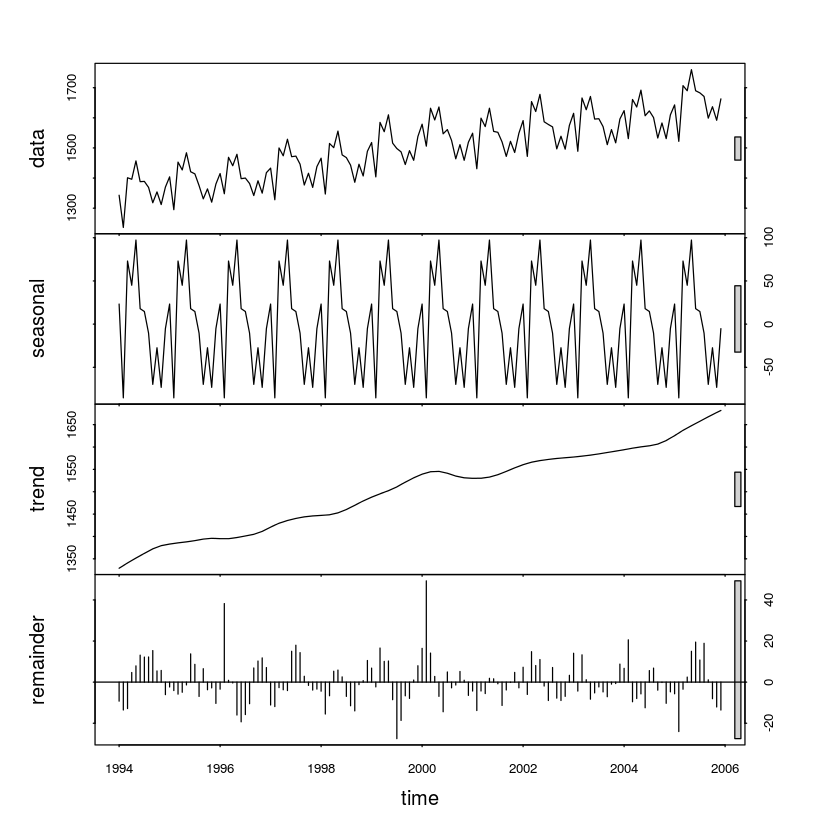

In [19]:
plot(milk.loess)

### Interpret and compare the results with those from the other model

We see an upward trend and very predictable seasonalilty, but
the remainder part has outliers:

* trend: slight dip in 2000 / 2001
* remainder: local maxima in 1996 and 2000; local minima in 1999 and 2005